In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline

In [2]:
PATH = "winemag-data_first150k.csv"
DATASET_SIZE = 10000
DEGREES = 1
X = "price"
Y = "points"

In [3]:
dataset = pd.read_csv(PATH)
dataset = dataset.dropna(subset=[X])
dataset = dataset.head(DATASET_SIZE)

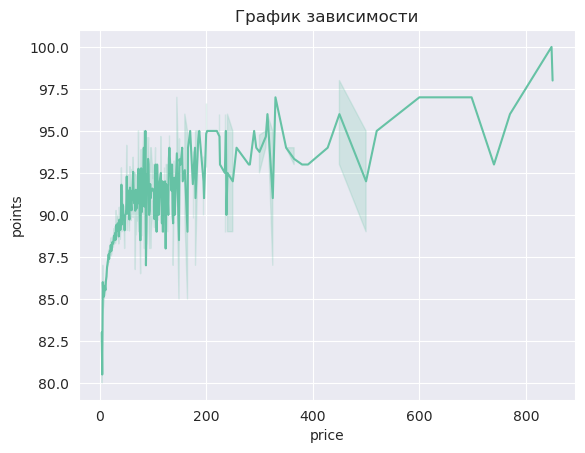

In [4]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
    x=dataset[X],
    y=dataset[Y],
)
plt.title('График зависимости')
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

In [5]:
x = np.log1p(np.array(dataset[X]).reshape(-1, 1))
y = np.array(dataset[Y]).reshape(-1, 1)

In [6]:
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 5.462480750332344


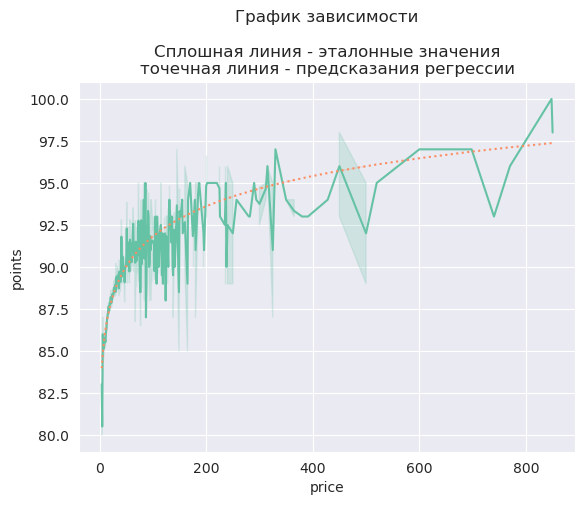

In [7]:
sns.lineplot(
    x=dataset[X],
    y=dataset[Y],
    linestyle="solid"
)
sns.lineplot(
    x=dataset[X],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel(X)
plt.ylabel(Y)
plt.show()

In [8]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)
x_parameters

array([79.77171227,  2.60946251])